# Exploratory Data Analysis

### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
game_data = pd.read_csv("data/game_data_cleaned.csv")

In [3]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345006 entries, 0 to 345005
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   released                     345006 non-null  int64
 1   suggestions_count            345006 non-null  int64
 2   has_achievements             345006 non-null  bool 
 3   in_series                    345006 non-null  bool 
 4   platform_3DO                 345006 non-null  int64
 5   platform_Android             345006 non-null  int64
 6   platform_Apple II            345006 non-null  int64
 7   platform_Atari 2600          345006 non-null  int64
 8   platform_Atari 5200          345006 non-null  int64
 9   platform_Atari 7800          345006 non-null  int64
 10  platform_Atari 8-bit         345006 non-null  int64
 11  platform_Atari Flashback     345006 non-null  int64
 12  platform_Atari Lynx          345006 non-null  int64
 13  platform_Atari ST            

In [4]:
game_data.head()

,released,suggestions_count,has_achievements,in_series,platform_3DO,platform_Android,platform_Apple II,platform_Atari 2600,platform_Atari 5200,platform_Atari 7800,...,genre_Indie,genre_Massively Multiplayer,genre_Platformer,genre_Puzzle,genre_RPG,genre_Racing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy
0,2010,24,False,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013,102,False,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,57,False,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2015,120,False,False,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2014,31,False,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploring Data

**Percent of games with achievements**

In [5]:
len(game_data[game_data['has_achievements']==True]) / len(game_data)

0.04612673402781401

**Percent of games in series**

In [6]:
len(game_data[game_data['in_series']==True]) / len(game_data)

0.007028863266146096

**Number of games per year**

In [7]:
game_data.released.value_counts()

2020    85279
2019    58504
2018    54854
2017    45333
2016    33085
2015    20650
2014    12626
2013     5564
2012     4633
2011     3572
2010     3056
2009     2245
2008     1326
2007     1058
2006      997
2004      949
2005      919
2001      918
2003      917
2000      804
2002      788
1997      707
1995      689
1994      623
1999      605
1996      597
1993      561
1998      546
1992      485
1991      402
1990      367
1989      271
1988      196
1987      188
1986      128
1985      122
1984      106
1983      104
2021       86
1982       65
1981       32
1980       14
1978       10
1979        8
1977        8
1976        5
1971        2
1973        1
1972        1
Name: released, dtype: int64

It appears that with a few exceptions, more games are released each year than the year before. Let's see how they are distributed with a histogram.

Text(0, 0.5, 'Games Released')

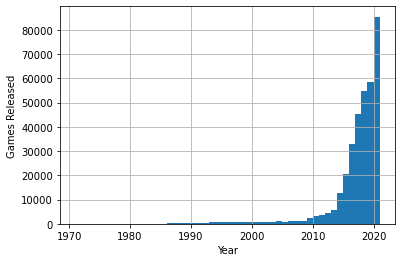

In [8]:
game_data.released.hist(bins=50)
plt.xlabel('Year')
plt.ylabel('Games Released')

So it looks like the vast majority of games have been released in the past decade. Hopefully this doesn't lead to years with fewer games overperforming due to smaller sample sizes.

**Average number of suggestions by Year**

In [9]:
year_suggestions = game_data.groupby(by='released')['suggestions_count'].mean()

In [10]:
year_suggestions_sorted = year_suggestions.sort_values(ascending=False)
year_suggestions_sorted

released
2007    343.390359
2005    325.968444
2006    318.827482
2004    304.449947
2003    302.856052
2008    300.757919
2002    288.442893
2000    283.982587
1999    282.271074
1971    281.500000
2021    279.906977
2001    279.111111
1998    255.639194
2009    245.946993
1987    242.409574
1993    232.643494
1988    232.341837
1992    229.870103
1989    227.435424
1996    224.390285
1991    224.174129
1994    222.686998
1997    222.531825
1990    220.370572
1986    219.515625
1995    219.317852
1985    207.622951
2010    206.814136
2011    192.033035
1984    177.839623
1981    174.093750
2012    171.470969
2013    163.896837
1983    151.548077
1979    151.250000
1982    126.430769
2014    122.905592
2015    115.943293
2016    110.407012
1980    108.714286
2017     98.368892
2018     90.003281
1978     87.700000
1976     84.000000
2019     77.352745
2020     58.878352
1973     43.000000
1977     34.500000
1972     13.000000
Name: suggestions_count, dtype: float64

Text(0, 0.5, 'Average number of suggestions per game')

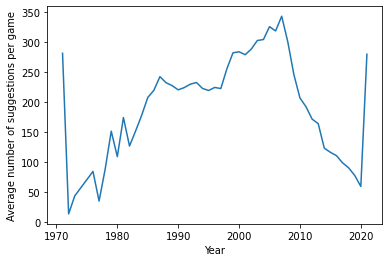

In [11]:
plt.plot(year_suggestions)
plt.xlabel('Year')
plt.ylabel('Average number of suggestions per game')

The average number of suggestions per game seems to have peaked in 2007. 2021 and the early 70s appear to be outliers but there are relatively few games released in those years which could explain that.

**Average number of suggestions for games with achievements**

In [12]:
achievements_suggestions = game_data[game_data['has_achievements']==True]['suggestions_count'].mean()
achievements_suggestions

313.32505969586526

**Average number of suggestions for games without achievements**

In [13]:
no_achievements_suggestions = game_data[game_data['has_achievements']==False]['suggestions_count'].mean()
no_achievements_suggestions

89.27008860744108

It appears that games with achievements recieve more suggestions on average

**Average number of suggestions for games in a series**

In [14]:
series_suggestions = game_data[game_data['in_series']==True]['suggestions_count'].mean()
series_suggestions

382.9958762886598

**Average number of suggestions for games not in a series**

In [15]:
no_series_suggestions = game_data[game_data['in_series']==False]['suggestions_count'].mean()
no_series_suggestions

97.59899702552097

It appears that games in a series recieve more suggestions on average

### Checking for Correlation

I am going to generate a heatmap to determine if there is correlation between columns.

**Generating Heatmap**

<AxesSubplot:>

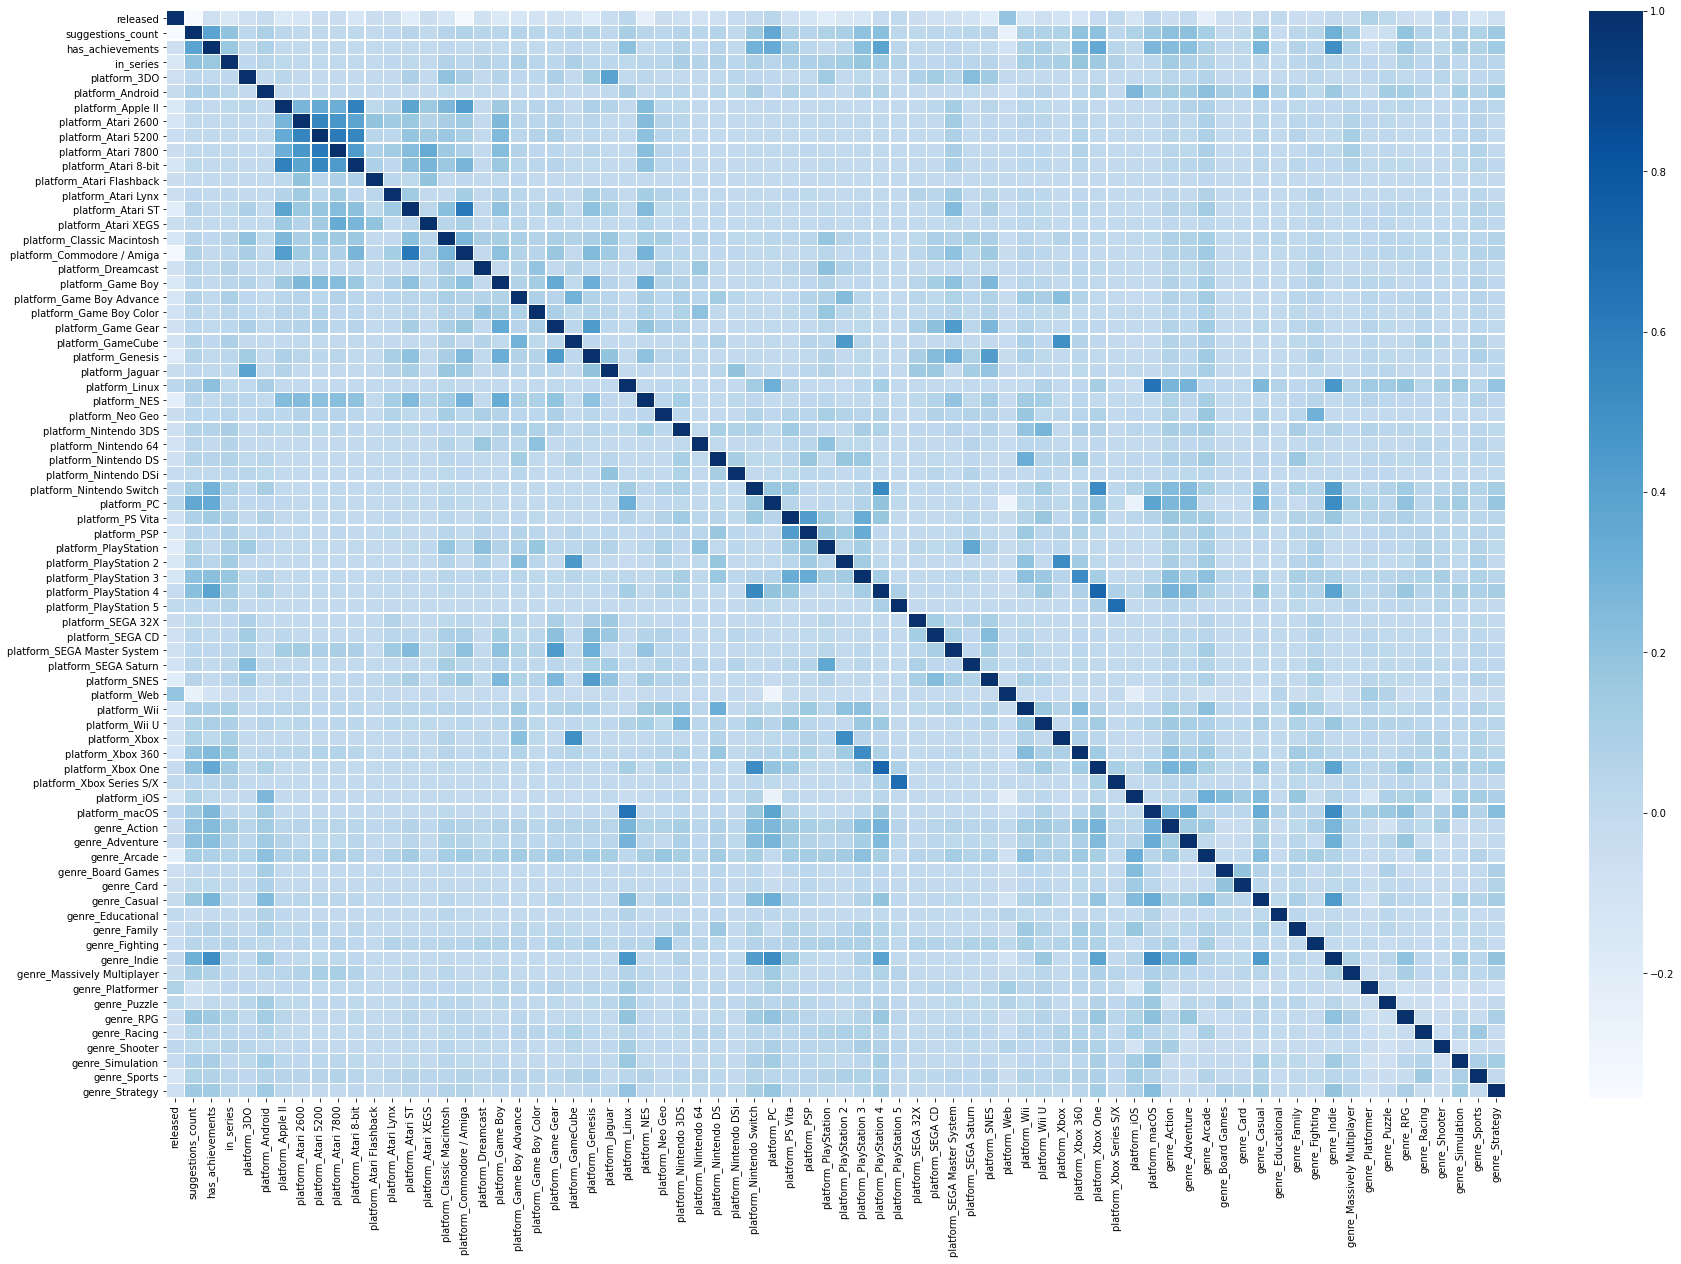

In [16]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(game_data.corr(), cmap="Blues", linewidth=0.3)

Looking at the heatmap, it appears that the columns most positively correlated with suggestions count are has_achievements, platform_PC, and genre_Indie. The most negatively correlated columns are platform_Web and interestingly enough, released. This suggests that players are more likely to enjoy games that have achievements, games released on the PC, and indie games. It also suggests that players are less likely to enjoy web-based games, and they prefer older games to ones released more recently.